A study of mass shootings in the USA
====
### Joyceline Marealle
 

### CHE 116: Numerical Methods and Statistics PROJECT


##### 4/16/2018


All needed math libraries are imported in the cell below.

In [264]:
import math
import numpy as np
from sympy import symbols,solve
from scipy.misc import comb, factorial
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as ss
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt; plt.rcdefaults()
import pydataset

OVERVIEW
===

This project will analyse the effect of two different variables on the magnitude
and fruition of USA mass shootings that have taken place in the last 50 years. The
variables to be analysed are gender and mental status of
shooters. The project chosen is of type 1 and the data set to be used is of the USA
mass shootings in the last 50 years. The numerical methods that will be used are
histogramming and hypothesis testing. 

From ‘The Wiley Handbook of the
Psychology of Mass Shootings’ and ‘Shooting Alone: The Pre-attach Experiences
and Behaviors of US Solo Mass Murders’, there has been an elaboration on what
fuels mass shootings in the USA. These driving forces culminates a range of
personal, political and social drives and how convenient audiences are targeted to make mass shootings successful.

In this project, there will be sorting of data given in csv files, plotting of bar graphs of gender and mental status of shooter against number of victim and lastly, the exploration of the relationship between gender and mass shooting and the number of victims in a mass shooting. The hypothesis test that will be used will be the Spearman's correlation test.



In [265]:
#the data is read in from the csv files given.
#mshooting = pd.read_csv('116project_data/shootings/Mass Shootings Dataset Ver 4.csv', encoding='latin1')

In [266]:
mshooting = pd.read_csv('116project_data/shootings/Mass Shootings Dataset Ver 4.csv',encoding='latin1').as_matrix()

In [267]:
#the data is printed out to see how it looks like.
print(mshooting)

[[1 'Las Vegas Strip mass shooting' 'Las Vegas, NV' ... 'M' 36.181271
  -115.13413200000001]
 [2 'San Francisco UPS shooting' 'San Francisco, CA' ... 'M' nan nan]
 [3 'Pennsylvania supermarket shooting' 'Tunkhannock, PA' ... 'M' nan nan]
 ...
 [318 'St. Aloysius Church' 'Spokane, Washington' ... 'Male' 47.67367375
  -117.41598429999999]
 [319 'Rose-Mar College of Beauty' 'Mesa, Arizona' ... 'Male' 33.42268696
  -111.8163202]
 [320 'University of Texas at Austin' 'Austin, Texas' ... 'Male'
  30.198887300000003 -97.84415949]]


###### From the data,
It is observed that the variables needed : number of victims, gender of shooter and<br>

mental status of shooter are from the $column[11]$, $column[18]$, $column[16]$ respectively.

#### Investigating the relationship between the gender of shooter and mass shootings

In [324]:
#printing the genders we have of the mass shooters from mshooting dat
print(genders)

('Female', 'Male', 'Male/Female', 'Unknown')


In [327]:
#Sorting out data to have number of victims for each shooting done by each respective gender.
genders = np.unique(mshooting[:,18])
gdata = []
#slice out each set of rows that matches label
#and add to list
for gender in genders:
    gdata.append(mshooting[mshooting[:,18] == gender, 11].astype(float))
print('Shootings for each gender: ',gdata)


Shootings for each gender:  [array([ 6.,  6.,  7.,  8., 11.]), array([585.,   5.,   3.,   5.,   3.,   3.,  11.,   5.,   6.,  16., 102.,
        17.,   8.,  12.,   4.,  19.,  15.]), array([35.]), array([ 6.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,
        3.,  9.,  8.,  5.,  4.,  7.,  4.,  5.,  4.,  4.,  4., 17.,  4.,
        4.,  4.,  4.,  8.,  3., 12.,  3.,  3.,  8.,  3.,  5.,  5.,  3.,
        4.,  5.,  4.,  5.,  4.,  5.,  6.,  4.,  3.,  3.,  3.,  3.,  4.,
       16.,  3., 10.,  5.,  4.,  4.,  3.,  7.,  8., 11.,  4.,  7.,  4.,
        4., 10.,  4.,  4.,  3.,  4.,  5.,  4.,  4.,  4.,  5.,  7.,  5.,
        4.,  4.,  5.,  4.,  3.,  7.,  3.,  6.,  3.,  5.,  3.,  3.,  8.,
        3.,  4.,  4.,  3.,  3.,  6.,  3.,  6.,  5.,  4.,  8.,  4.,  5.,
        7.,  4.,  3.,  5.,  4., 10.,  3.,  6., 19.,  8.,  8.,  4.,  3.,
       15.,  4.,  8.,  6.,  7.,  8.,  7.,  4.,  6.,  6.,  7.,  3.,  5.,
       29.,  3.,  7., 15.,  8., 10., 82.,  6.,  6.,  7.,  5., 10.,  6.,
        5.,  

###### The interpretation of the data:
is that the list shows an array of number of victims for each shooting commited by a respective gender.

##### Sorting out data
There has been duplication of data entry in the genders entered. There was entry of $M$ and $Males$ which both refer to males. Also there was entry of $M/F$ and $Male/Female$ which are the same data. 

These two types of data entered will be combined so as to obtain total males and male/females


In [270]:
# Combining male and M data
# M = gdata[1]
# Male= gdta[3]
maletotal=np.concatenate([gdata[1], gdata[3]])
print('Total Males',maletotal)

Total Males [585.   5.   3.   5.   3.   3.  11.   5.   6.  16. 102.  17.   8.  12.
   4.  19.  15.   6.   4.   4.   4.   4.   3.   3.   3.   3.   3.   3.
   3.   4.   3.   9.   8.   5.   4.   7.   4.   5.   4.   4.   4.  17.
   4.   4.   4.   4.   8.   3.  12.   3.   3.   8.   3.   5.   5.   3.
   4.   5.   4.   5.   4.   5.   6.   4.   3.   3.   3.   3.   4.  16.
   3.  10.   5.   4.   4.   3.   7.   8.  11.   4.   7.   4.   4.  10.
   4.   4.   3.   4.   5.   4.   4.   4.   5.   7.   5.   4.   4.   5.
   4.   3.   7.   3.   6.   3.   5.   3.   3.   8.   3.   4.   4.   3.
   3.   6.   3.   6.   5.   4.   8.   4.   5.   7.   4.   3.   5.   4.
  10.   3.   6.  19.   8.   8.   4.   3.  15.   4.   8.   6.   7.   8.
   7.   4.   6.   6.   7.   3.   5.  29.   3.   7.  15.   8.  10.  82.
   6.   6.   7.   5.  10.   6.   5.   5.   9.  12.   9.   4.  12.  19.
  11.   5.   4.  45.  18.  11.   6.  10.  16.  11.   3.   3.   7.  26.
   7.   6.   9.  13.   4.   4.   7.  55.  10.   9.  11.  10.   5.

In [271]:
# Combining male/female and M/F data
# Male/female = gdata[4]
# M/F= gdta[2]
MFtotal=np.concatenate([gdata[2], gdata[4]])
print('MaleFemale total',MFtotal)

MaleFemale total [35. 35.  4.  3.  6.]


In [272]:
# gdata is defined as Newdata
newdata=gdata
#the newdata[1] is equal to the total  male shooters
newdata[1]=maletotal
#the new newdata[2] is equal to the total  male/female shooters
newdata[2]=MFtotal
# The newdata[3] and newdata[4] are now deleted from the list of newdata
#deleting the list of male in mshoot
newdata.pop(3)
#deleting the list of male/female
newdata.pop(4)
#printing the newdata[1] and newdata[2]
#print(newdata[1])
#print(newdata[2])



array([4., 5., 5., 4., 4., 5., 5., 4., 4., 5., 4., 4., 4., 5., 4., 4., 8.,
       8., 4., 4., 4.])

##### A violin plot will be plotted to represent the data

This plot will give a better visualization of the distribution of data and its probability density. The black bar represents the interquartile range and the dot represents the median

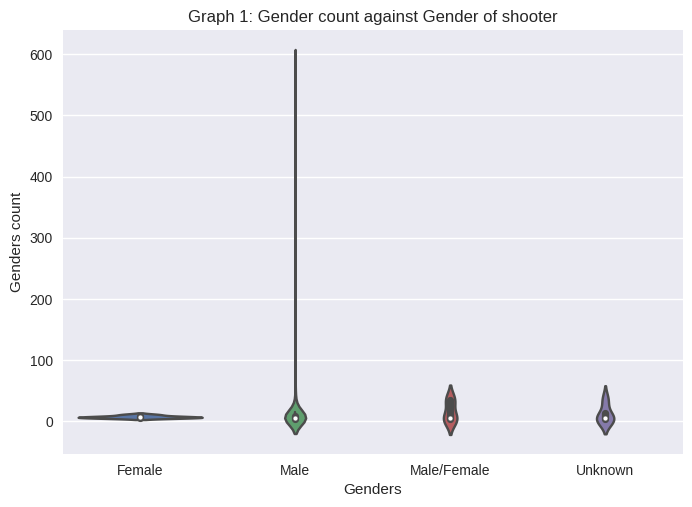

In [322]:
sns.violinplot(data=newdata)
plt.xticks(range(len(genders)),['Female', 'Male', 'Male/Female','Unknown'])
plt.xlabel('Genders')
plt.ylabel('Genders count')
plt.title('Graph 1: Gender count against Gender of shooter')
plt.show()

###### The violin plot looks compressed because of the few number of data from the csv file.

#### A Bar graph will be plotted

In [323]:
#length of each number of shootings respectively for  each gender is calculated
#This is because it is needed in the bar graph plot
print('Gender count :',len(newdata[0]),len(newdata[1]),len(newdata[2]),len(newdata[3]))
print('')
#The average victim is calculated by summing the total of victims divided by number of shooting for each gender
print('Average victim:',np.sum(newdata[0])/len(newdata[0]),np.sum(newdata[1])/len(newdata[1]),np.sum(newdata[2])/len(newdata[2]),np.sum(newdata[3])/len(newdata[3]))

Gender count : 5 289 5 4

Average victim: 7.6 10.522491349480969 16.6 12.0


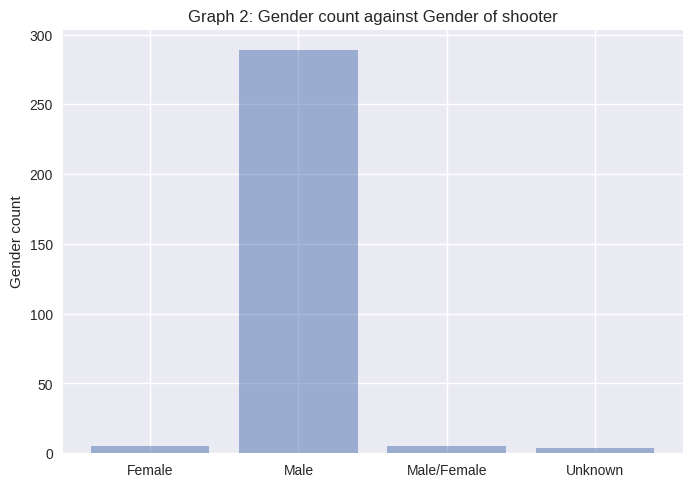

In [304]:
plt.style.use('seaborn')
genders = ('Female', 'Male', 'Male/Female', 'Unknown')
g= np.arange(len(genders))
gendercount = [len(newdata[0]),len(newdata[1]),len(newdata[2]),len(newdata[3])]
plt.bar(g, gendercount, align='center', alpha=0.5)
plt.xticks(g, genders)
plt.ylabel('Gender count')
plt.title('Graph 2: Gender count against Gender of shooter')
 
plt.show()

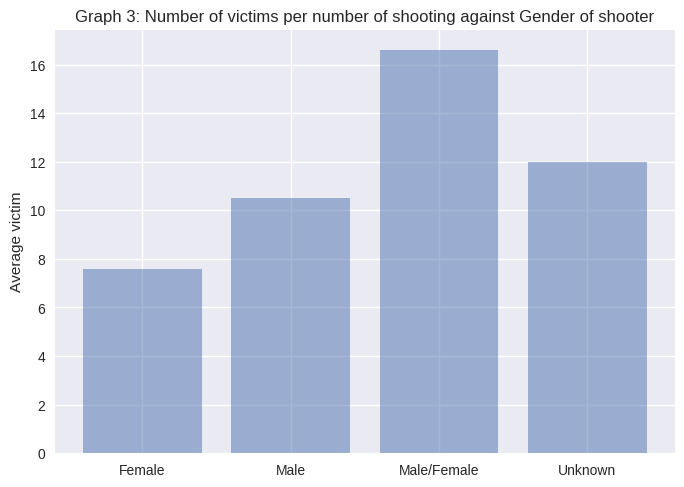

In [328]:
plt.style.use('seaborn')
genders = ('Female', 'Male', 'Male/Female', 'Unknown')
g= np.arange(len(genders))
gendercount = [np.sum(newdata[0])/len(newdata[0]),np.sum(newdata[1])/len(newdata[1]),np.sum(newdata[2])/len(newdata[2]),np.sum(newdata[3])/len(newdata[3])]
plt.bar(g, gendercount, align='center', alpha=0.5)
plt.xticks(g, genders)
plt.ylabel('Average victim')
plt.title('Graph 3: Number of victims per number of shooting against Gender of shooter')
 
plt.show()

#### Graphs Interpretation

From the Violin plot and Bar graph it can be concluded that the shooters in the USA are mostly male compared to female. This is because the gender male had a count of 289 when compared to that of female of 5

Also, the highest number of victims per shooting was *16.6* by gender of male/ female. Nevertheless, when male and female are  compared , the male still had a higher average victims caused of *10.5* compared to females which was *7.6* 

### Gender and Mass shooting correlation

It is investigated to see  if there is a correlation between the amount of mass shootings and the gender of the shooter. <br>

###### Null hypothesis: 
The amount of  mass shootings in USA is not correlated to the gender of the shooter.<br>
    
###### Test choice: 
The Spearman's mans correlation test. This is because the two measurements : number of  mass shootings is different from the gender of the shooter and they are matched

##### P value
is from the double sided tails

In [329]:
corregendersandcounts = ss.spearmanr(range(len(genders)),genders)[1]

print("P-value: {:.7}".format(corregendersandcounts))
print('')
print('The null hypothesis is rejected since the p value is less than the significance value of 0.05.')
print('This means that there is a correlation between the number of victims in a mass shooting and the gender of a shooter')

P-value: 0.0

The null hypothesis is rejected since the p value is less than the significance value of 0.05.
This means that there is a correlation between the number of victims in a mass shooting and the gender of a shooter


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


$P-Value$ is zero; so, the null hypothesis is rejected. <br>


The conclusion drawn is that there is a correlation between the gender of the mass shooter and the number of shootings in the USA.

#### Investigating the relationship between the mental status of shooter and mass shootings



In [330]:
#printing the mental status we have of the mass shooters from mshooting data
mental = np.unique(mshooting[:,16])
print(mental)

['No' 'Unclear' 'Unknown' 'Yes' 'unknown']


In [331]:
#Sorting out data to have number of victims for each shooting done by each respective mental status of shooter.
mental = np.unique(mshooting[:,16])
mdata = []
#slice out each set of rows that matches label
#and add to list
for m in mental:
    mdata.append(mshooting[mshooting[:,16] == m, 11].astype(float))
print(mdata)


print('')


[array([ 8.,  5.,  4.,  5.,  4.,  7.,  6.,  3.,  3.,  8.,  3.,  4.,  4.,
        3.,  4.,  3.,  6.,  6.,  5.,  4.,  8.,  4.,  5.,  4.,  5.,  4.,
       10.,  3.,  6.,  8.,  6.,  8.,  4.,  6.,  6.,  3.,  7., 10.,  5.,
        5., 11.,  6.,  6., 16., 11.,  3.,  3.,  7.,  7.,  6.,  6.,  9.,
        4., 10., 11.,  9., 11.,  8.,  6.,  3.,  3.,  6., 15.,  9.,  8.,
        4.,  6.,  6., 15.,  3.,  6.,  7.,  3.,  5.,  5.,  4., 25.,  4.,
       12.,  3., 14.,  6.,  4.,  6.,  9., 17.,  4.,  6.,  3., 10.]), array([585.,   3.,   5.,   3.,  16., 102.,  17.,   8.,  35.,  12.,  15.,
         7.,   7.]), array([ 4.,  5.,  6.,  4.,  5.,  4.,  4.,  4.,  4.,  5.,  3.,  3.,  3.,
        3.,  3.,  5.,  4.,  4.,  4.,  3.,  5.,  4.,  9.,  8.,  5.,  4.,
        4.,  7.,  4.,  4.,  5.,  4.,  4.,  4., 17.,  4.,  4.,  4.,  5.,
        4.,  4.,  4.,  3., 12.,  8.,  8.,  4.,  3.,  3.,  8.,  3.,  5.,
        3.,  4.,  4.,  5.,  4.,  4.,  5., 35.,  4.,  5.,  6.,  4.,  3.,
        3.,  3.,  4., 16.,  3., 10.,  5.,  4

###### The interpretation of the data:
Is that the list shows an array of number of victims for each shooting commited by  respective mental status of a shooter.

There has been duplication of data entry in the mental status entered. There was entry of $Unknown$ and $Unknown$ which have to be combined. 

These two types of data entered will be combined so as to obtain total Unknowns.

In [279]:
#combining the two unknown data set to obtain a total of shooters of unknown mental status.
unknowntotal=np.concatenate([mdata[2], mdata[4]])
print('unknown',unknowntotal)

unknown [ 4.  5.  6.  4.  5.  4.  4.  4.  4.  5.  3.  3.  3.  3.  3.  5.  4.  4.
  4.  3.  5.  4.  9.  8.  5.  4.  4.  7.  4.  4.  5.  4.  4.  4. 17.  4.
  4.  4.  5.  4.  4.  4.  3. 12.  8.  8.  4.  3.  3.  8.  3.  5.  3.  4.
  4.  5.  4.  4.  5. 35.  4.  5.  6.  4.  3.  3.  3.  4. 16.  3. 10.  5.
  4.  3.  7.  8.  4.  4.  4.  4.  4.  3.  4.  5.  4.  7.  5.  4.  3.  3.
  5.  3.  3.  8.  7.  4.  3. 15.  6. 12.  9. 10.  5.  6.  3.  6.  4. 14.
  7.  8. 10.]


In [332]:
# mdata is now defined as ndata
ndata=mdata
# ndata[2] is now equal to unknown total 
ndata[2]=unknowntotal
# The ndata[2] is now deleted from the list of newdata
# deleting the list of second unknown in ndata
# deleting the unknown of column 4
ndata.pop(4)

array([10.])

#### A violin plot will be plotted

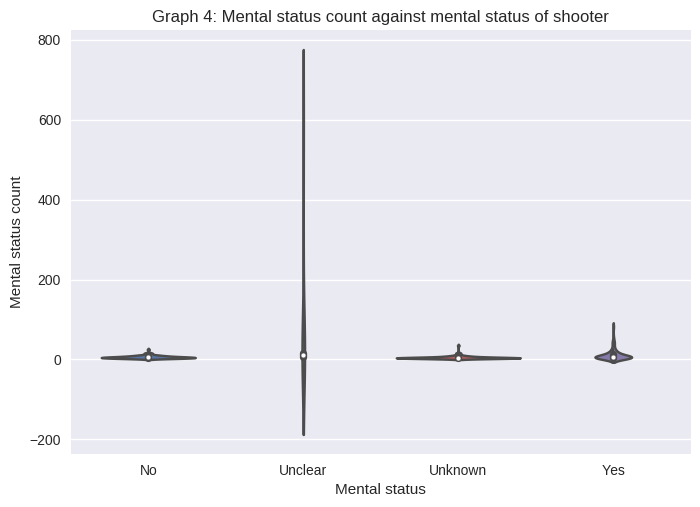

In [333]:
sns.violinplot(data=ndata)
plt.xticks(range(len(mental)-1),['No', 'Unclear', 'Unknown', 'Yes'])
plt.xlabel('Mental status')
plt.ylabel('Mental status count')
plt.title('Graph 4: Mental status count against mental status of shooter')
plt.show()

#### A Bar graph will be plotted

In [334]:
#average of number of victims per shooting of each mental status of shooter
print('')
print('The sum of victims per number of shootings of each mental status is calculated')
print('')
print('Average victim :',np.sum(ndata[0])/len(ndata[0]),np.sum(ndata[1])/len(ndata[1]),np.sum(ndata[2])/len(ndata[2]),np.sum(ndata[3])/len(ndata[3]))
# mental status count
print('')
print('Mental status count :',len(ndata[0]),len(ndata[1]),len(ndata[2]),len(ndata[3]))


The sum of victims per number of shootings of each mental status is calculated

Average victim : 6.588888888888889 62.69230769230769 5.513513513513513 11.69811320754717

Mental status count : 90 13 111 106


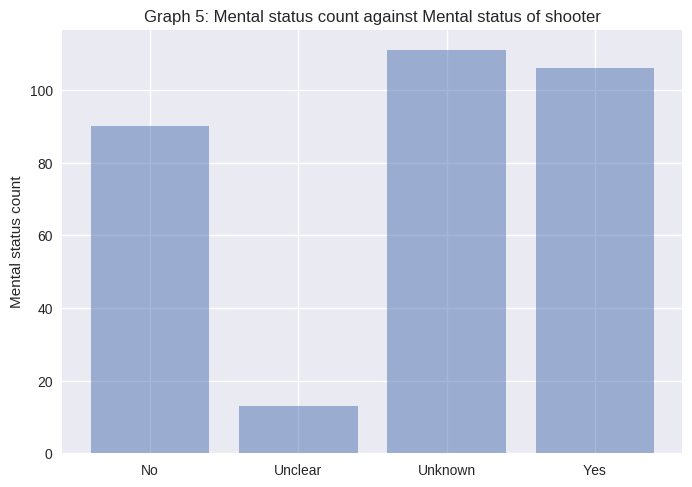

In [335]:
plt.style.use('seaborn')
mentalstatus = ('No', 'Unclear', 'Unknown', 'Yes')
m= np.arange(len(mentalstatus))
mentalstatuscount = [len(ndata[0]),len(ndata[1]),len(ndata[2]),len(ndata[3])]
plt.bar(m, mentalstatuscount, align='center', alpha=0.5)
plt.xticks(m, mentalstatus)
plt.ylabel('Mental status count')
plt.title('Graph 5: Mental status count against Mental status of shooter')
 
plt.show()

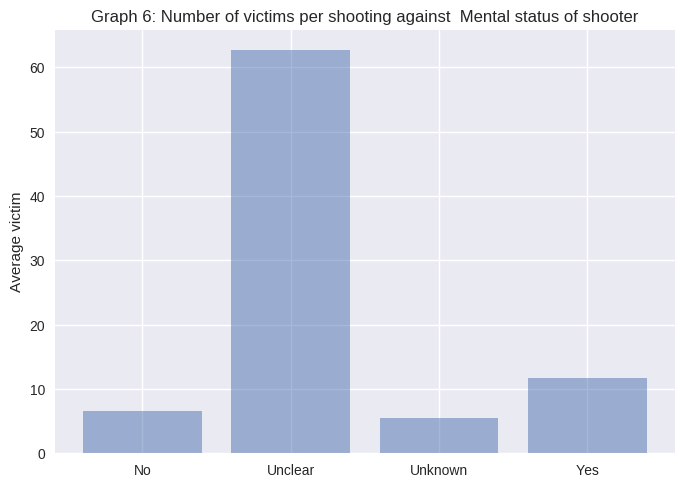

In [336]:
plt.style.use('seaborn')
mentalstatus = ('No', 'Unclear', 'Unknown', 'Yes')
m= np.arange(len(mentalstatus))
mentalstatuscount = [np.sum(ndata[0])/len(ndata[0]),np.sum(ndata[1])/len(ndata[1]),np.sum(ndata[2])/len(ndata[2]),np.sum(ndata[3])/len(ndata[3])]
plt.bar(m, mentalstatuscount, align='center', alpha=0.5)
plt.xticks(m, mentalstatus)
plt.ylabel('Average victim')
plt.title('Graph 6: Number of victims per shooting against  Mental status of shooter')
 
plt.show()

##### Graphs intepretation
From the Violin plot and Bar graph it can be concluded that the mental status of shooters in the USA were mostly unclear since it had a count of 111 . This implies that the shooters could have or not have a mental disorder. Also, when comparing the *yes* and *no* counts, there were 106 shooters of mental disorder and 90 of normal mental status shooters.

Also, the highest number of victims per shooting was *62.9* by shooters of unclear mental status. Nevertheless, when shooters of mental disorder and normal are  compared , the shooters with mental disorders still had a higher average victims caused of *11.69 compared to normal shooters which was *6.58* 


### Mental status and Mass shootings correlation

It is investigated to see  if there is a correlation between the amount of  mass shootings and the mental status of the shooter. <br>

###### Null hypothesis: 
The amount of  mass shootings in USA is not correlated to the mental status of the shooter.<br>
    
###### Test choice: 
The Spearman's mans correlation test. This is because the two measurements : number of  mass shootings is different from the mental status of the shooter and they are matched

##### P value
is from the double sided tails

In [337]:
corrementalstatusandcounts = ss.spearmanr(range(len(mentalstatus)),mentalstatus)[1]

print("P-value: {:.7}".format(corregendersandcounts))
print('')
print('The null hypothesis is rejected since the p value is less than 0.05.')
print('This means that there is a correlation between the number of victims in a mass shooting and the mental status of a shooter')

P-value: 0.0

The null hypothesis is rejected since the p value is less than 0.05.
This means that there is a correlation between the number of victims in a mass shooting and the mental status of a shooter


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


$P-Value$  is zero;so, the null hypothesis is rejected. <br>


The conclusion drawn is that there is a correlation between the mental status  of the mass shooter and the number of shootings in the USA.

### Conclusions.

Based on the investigation of how the gender and mental status of shooters relates to the number of shootings and victims. It can be concluded that; 

There is a relationship between the gender of the shooter and the number  mass shootings and victims. From the graph 1 , 2 and 3. A male shooter  has a high number of mass shooting count compared to female. From the report of *' A study Active shooters incidents in the United States from 2000 and 2013'*  in page 12, it was reported that the shooters were more likely to be male and only 3.8% of the shooters in 2000-2013 were females. This report is consistent with the conclusions obtained.

Also,there is a relationship between the mental status of the shooters and the number of mass shootings and victims.From the graph 5,the shooters who had a mental problem had a high rate of shootings of 106 compared to those of normal mental status of 90. There was not a good record of the mental status of shooters kept since the majority of the shootings were done by shooters of unclear mental status.

Additionally, from the graph 6, the shooters who had a mental problem had a high average of victims of 11.69 compared to those of normal mental status of 6.58. From the report,*'Don't Blame mental illness for mass shootings ; blame men'*, it discovered that in the past 38 years only 14.8 % of the shooters of mass shootings had a mental illness. This a very low percentage. This shows that most of the mass shootings are done by people of normal mental status. Another, fact is that most of the shootings were not found to have a serious mental illness but had one thing in common that they were male


### Bibliography


A study Active shooters incidents in the United States from 2000 and 2013. (2013). 1st ed. WASHINGTON DC: FBI, pp.12-20.

Datavizcatalogue.com.(2018). Violin Plot - Learn about this chart and tools to create it. [online] Available at: https://datavizcatalogue.com/methods/violin_plot.html [Accessed 16 Apr. 2018]


Gold, L. and Simon, R. (n.d.). Gun violence and mental illness. ROBERT .I. SIMON.

Mass shooting csv files


Shafer, J. and Kenen, J. (2018). Don’t Blame Mental Illness for Mass Shootings; Blame Men. [online] POLITICO Magazine. Available at: https://www.politico.com/magazine/story/2018/01/17/gun-violence-masculinity-216321 [Accessed 17 Jan. 2018].

SILVER, G. and HORGAN, J. (2017). Shooting Alone: The Pre-Attack Experiences and Behaviors of US Solo Mass Murderers. 3rd ed. WILEY, pp.3-6.

Pythonspot.com. (2018). Matplotlib Bar chart – Python Tutorial. [online] Available at: https://pythonspot.com/matplotlib-bar-chart/ [Accessed 16 Apr. 2018].

